# Homework 2 (66 pts)

## Overview
This homework will walk you through the process of geospatial data analysis under the short-term rental market (Airbnb) context in New York City. Through this practice, you will get more familiar with pandas, numpy, geopandas, seaborn, and matplotlib modules to retrieve, clean, and visulaize geospatial data. 

## Grading
Each exercise will be graded based on the following rubrics:
- 2 points. Completed the task, presented the expected results, and codes were well documented and explained.
- 1 point. Completed the task with some disparity from the expected results.
- 0 point. Did not complete the excercise.

## Late submission policy
For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

## 1. Read and Clean Data
### 1.1 Read and Clean Census Tract Data (4 pts)
Homework 1 presented detailed steps of downloading and cleaning census tract data while here you can try Socrata to retrieve the same dataset. Use the following link: https://data.cityofnewyork.us/City-Government/2020-Census-Tracts-Tabular/63ge-mke6 and find the API Endpoint. 
- Specify the BoroName as Manhattan in the url. (2 pts)
- Transform the downloaded dataframe into a geodataframe and set the crs as 4326. (2 pts)

Present the geodataframe (name it as **ct**).

In [1]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
#import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import cenpy

from pysal.lib import weights
import contextily
from shapely.geometry import shape
# $Select BoroName, GEOID, the_geom 
url_qr = "https://data.cityofnewyork.us/resource/63ge-mke6.json?$where=BoroName='Manhattan'"
ct = pd.read_json(url_qr)
ct['the_geom'] = ct['the_geom'].apply(shape)
ct = gpd.GeoDataFrame(ct, geometry='the_geom').set_crs(epsg = 4326)
ct

<string>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
C:\Users\jewel\miniconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,the_geom,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area
0,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.00,1,Manhattan,100,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06
1,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",2.01,1,Manhattan,201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05
2,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",6.00,1,Manhattan,600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06
3,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",14.01,1,Manhattan,1401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06
4,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",14.02,1,Manhattan,1402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"MULTIPOLYGON (((-74.00860 40.71139, -74.00906 ...",13.00,1,Manhattan,1300,1001300,Financial District-Battery Park City,MN0101,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061001300,8814.236671,3.413076e+06
306,"MULTIPOLYGON (((-74.00921 40.71619, -74.00882 ...",21.00,1,Manhattan,2100,1002100,Tribeca-Civic Center,MN0102,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061002100,6740.332415,2.560061e+06
307,"MULTIPOLYGON (((-73.93445 40.83598, -73.93447 ...",243.02,1,Manhattan,24302,1024302,Harlem (North),MN1002,MN10,MN10 Harlem (CD 10 Equivalent),36061024302,7528.746448,2.269601e+06
308,"MULTIPOLYGON (((-73.92234 40.85568, -73.92230 ...",311.00,1,Manhattan,31100,1031100,Highbridge Park,MN1291,MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),36061031100,27245.589134,7.752364e+06


### 1.2 Read and Clean Airbnb Listing Data (2 pts)
Similar to homework 1, you are required to download and clean the Airbnb listing data and wrap all of them into one cell. Use the same link in homework 1 to download the listing data in New York City.
- Change *price* column type as float.
- Transform the dataframe into geodataframe using the latitude-longitude pairs.
- Spatial join **ct** with only *geoid*, *boroname* and *the_geom* columns to the listing geodataframe.

Ideally, you should only have the listings in Manhattan. Present your geodataframe **listing** below.

In [2]:
listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')
listing_raw.price = listing_raw.price.replace('[\$,]', '', regex=True).astype(float)
listing_g = gpd.GeoDataFrame(listing_raw, 
                             geometry = gpd.points_from_xy(listing_raw.longitude, 
                                                           listing_raw.latitude)).set_crs(epsg = 4326)
listing = gpd.tools.sjoin(listing_g, ct[['geoid', 'boroname', 'the_geom']], predicate="within", how='inner')
listing.info()

C:\Users\jewel\AppData\Local\Temp\ipykernel_23344\1635473542.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17333 entries, 0 to 34389
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            17333 non-null  int64   
 1   listing_url                                   17333 non-null  object  
 2   scrape_id                                     17333 non-null  int64   
 3   last_scraped                                  17333 non-null  object  
 4   source                                        17333 non-null  object  
 5   name                                          17325 non-null  object  
 6   description                                   17054 non-null  object  
 7   neighborhood_overview                         9538 non-null   object  
 8   picture_url                                   17333 non-null  object  
 9   host_id                                   

### 1.3 Retrieve American Community Survey (ACS) Data (6 pts)
The 3rd dataset is from American Community Survey. Use *cenpy* module to download the household income information in New York City and use census tract level as the geographic unit. Save the data as **acs_data** and name the column for household income as *median_hh_inc*. Present the information of **acs_data**. (2 pts)

In [3]:
acs_cp= cenpy.products.ACS()
acs_data = acs_cp.from_place('New York, NY', level='tract', variables=['B19013_001'])

Matched: New York, NY to New York city within layer Incorporated Places


C:\Users\jewel\AppData\Local\Temp\ipykernel_23344\2219475633.py:2: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  acs_data = acs_cp.from_place('New York, NY', level='tract', variables=['B19013_001'])


In [4]:
acs_data = acs_data.rename(columns={"B19013_001E": "median_hh_inc"})
acs_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GEOID          2066 non-null   object  
 1   geometry       2066 non-null   geometry
 2   median_hh_inc  2006 non-null   float64 
 3   state          2066 non-null   object  
 4   county         2066 non-null   object  
 5   tract          2066 non-null   object  
dtypes: float64(1), geometry(1), object(4)
memory usage: 113.0+ KB


Notice that *median_hh_inc* column includes null values. Replace all null values with the mean of the median household income. (2 pts)

In [5]:
acs_data['median_hh_inc'].fillna((acs_data['median_hh_inc'].mean()), inplace=True)

Plot the median household income by census tract. Five quantiles are used here with *GnBu* color ramp. Remember to add:
- Title
- Legend
- X-Y axis names

properly to the map. (2 pts)

<Axes: title={'center': 'ACS New York City Median Household Income by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

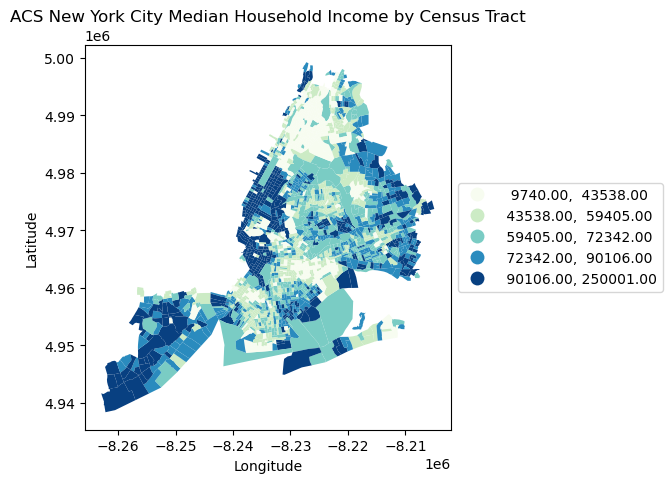

In [6]:
fig, ax = plt.subplots(figsize=(6,5), subplot_kw={'aspect':'equal'})
plt.title('ACS New York City Median Household Income by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

acs_data.plot(column='median_hh_inc', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax, 
              legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

## 2. Data Analysis & Visualization
### 2.1 Create Spatial Weights (12 pts)
ACS data is firstly analyzed. Create a spatial weight, *wq*, with *Queen* method and standardize the spatial weight. (2 pts)

In [7]:
wq = weights.Queen.from_dataframe(acs_data)
# wq = lps.weights.Queen.from_dataframe(acs_data)
wq.transform = 'r'

('WARNING: ', 229, ' is an island (no neighbors)')


C:\Users\jewel\miniconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 229.
  warnings.warn(message)


Since *median_hh_inc* column will be used repetitively, store this column in variable *y*. Therefore, *ylag* is generated from *y* to store the spatial lags of *median_hh_inc*. (2 pts)

In [8]:
y = acs_data['median_hh_inc']
ylag = weights.lag_spatial(wq, y)
# ylag = lps.weights.lag_spatial(wq, y)

To compare *y* with *ylag* visually, you can create two plots side by side. 
- Both maps should have 5 quantiles of *y* and *ylag* respectively with your choice of color ramp. (2 pts)
- Both maps should have proper titles and legends. (2 pts)
- Remove axis for both maps. (2 pts)

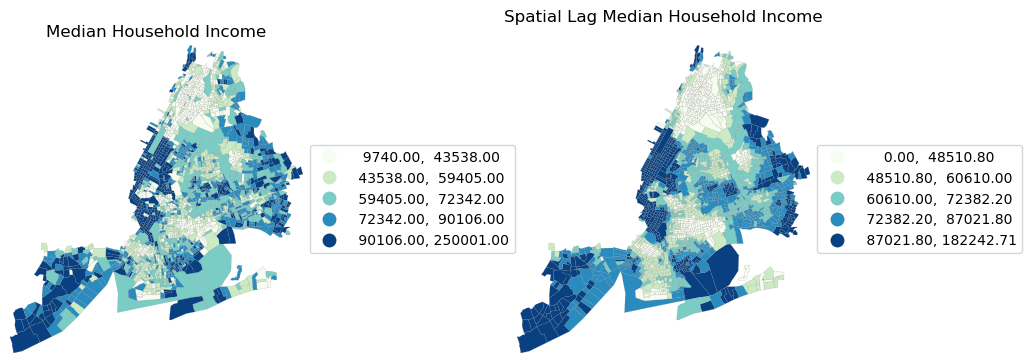

In [9]:
import numpy as np

acs_data['lag_median_hh_inc'] = ylag

f,ax = plt.subplots(1,2,figsize=(12,4))
acs_data.plot(column='median_hh_inc', ax=ax[0], edgecolor='grey', linewidth=0.1, 
              scheme="quantiles",  k=5, cmap='GnBu',
              legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax[0].axis(acs_data.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Median Household Income")

acs_data.plot(column='lag_median_hh_inc', ax=ax[1], edgecolor='grey', linewidth=0.1,
              scheme='quantiles', cmap='GnBu', k=5,
              legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax[1].axis(acs_data.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Median Household Income")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

Why do the two maps look different? How do you interpret the difference? (2 pts)

### 2.2 Global Spatial Correlation (8 pts)
By plotting median household income above, you will have some ideas about where the affluent and the less affluent people live. To verify your hypothesis, you can try to find how they are correlated with their neighbors globally.

Firstly, create a boolean list *yb* if the census tract's median household income (*y*) exceeds the median median household income in Manhattan (median of *y*). (2 pts)

In [10]:
y.median()

67046.0

In [11]:
yb = y > y.median()
sum(yb)

1033

Next, create a new column *yb* in **acs_data** where *0* means the census tract's median household income is below the median median household income and *1* means the rest. (2 pts)

In [12]:
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
acs_data['yb'] = yb

Plot census tracts whose household income are above the median as black and those below as white. (2 pts)

<Axes: >

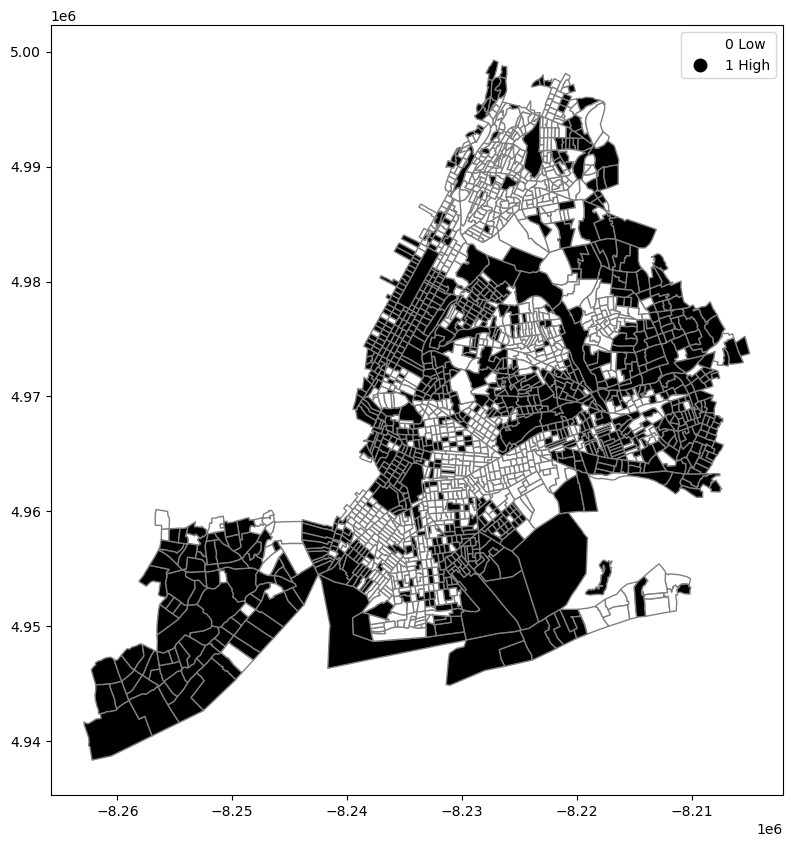

In [13]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
acs_data.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

Do you think a binary map is better at showing spatial disparity than the quantile map in Q2.1? (2 pts)

### 2.3 Moran's I (8 pts)
By looking at the maps, you are convinced that wealth is not distributed across NYC space evenly. Moran's I will provide you a statistical tool to further testify your hypothesis. 

To create a Moran Plot, you should first calculate the difference between the median household income and its mean. Then repeat the step for the spatial lags of the median household income. Add these two lists to **acs_data** as column *y_std* and *ylag_std*. (2 pts)
Then use seaborn module to make a scatter plot using the two columns. Add x and y axis names and tiles to the plot. (2 pts)

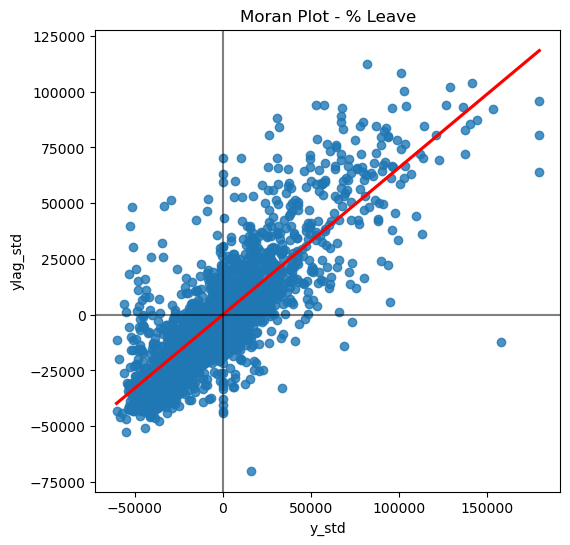

In [14]:
import seaborn
acs_data["y_std"] = (acs_data["median_hh_inc"] - acs_data["median_hh_inc"].mean())
acs_data["ylag_std"] = (acs_data["lag_median_hh_inc"] - acs_data["lag_median_hh_inc"].mean())

f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(x="y_std", y="ylag_std", ci=None, data=acs_data, line_kws={"color": "r"})
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

How do you interpret the Moran's Plot? Does it indicate a strong or weak autocorrelation? (2 pts)

What is the value of your Moran's I? (2 pts)

In [15]:
moran = esda.moran.Moran(y, wq)
moran.I

0.6594848030500569

### 2.4 Local Spatial Autocorrelation (8 pts)
The significant value of Moran's I confirms that the spatial distribution of NYC's wealth is highly uneven. But where are the richest neighborhoods and where are the poorest?

Firstly you can generate local Moran's I and name this variable as *li*. (2 pts)

In [16]:
wq

In [17]:
li = esda.moran.Moran_Local(y, wq)

C:\Users\jewel\miniconda3\lib\site-packages\esda\moran.py:1057: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


In [18]:
li.q

array([1, 1, 2, ..., 1, 1, 1])

Based on the significance value (less than 0.05), create a new column *cl* to **acs_data** with values of *0 ns*, *1 hot pot*, *2 doughnut*, *3 cold spot*, and *4 diamond*. (2 pts)
As the names indicate, Hot Spot is the neighborhoods with high household income and Cold Spot is the neighborhoods with low household income. Doughnut is the low-income neighborhoods surrounded by high-income neighbors while Diamond is the high-income neighborhoods surrounded by low-income neighbors.

In [19]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([1, 1, 0, ..., 1, 0, 0])

In [20]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

Plot the four types of census tracts with lightgrey to *0 ns*, red to *1 hot pot*, lightblue to *2 doughnut*, blue to *3 cold spot*, and pink to *4 diamond*. Add legend and titles to the plot. (2 pts)

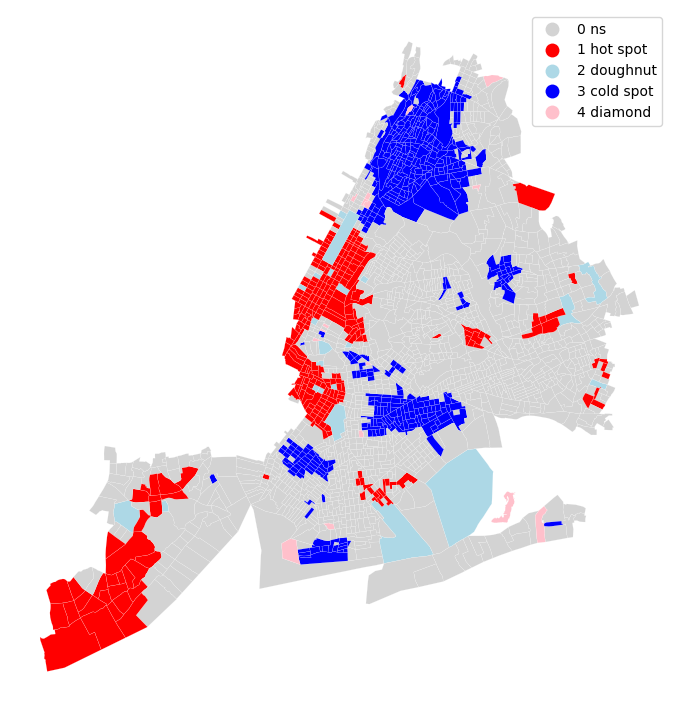

In [21]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
acs_data.assign(cl=labels).plot(column='cl', categorical=True, k=2, cmap=hmap, linewidth=0.1, ax=ax,
                                edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

How do you interpret the four types of colored regions under the NYC context? Why do some parks apprear as "doughnuts"? (2 pts)

### 2.5 Point Pattern Analysis (18 pts)
With an image of wealth distribution across NYC, now you can move to the Airbnb listing to see if locations of the short-term rental listing have any relationship with their neighborhoods.

Map all the listing in Manhattan by their coordinates and show the density on latitudes and longitudes respectively. (2 pts)

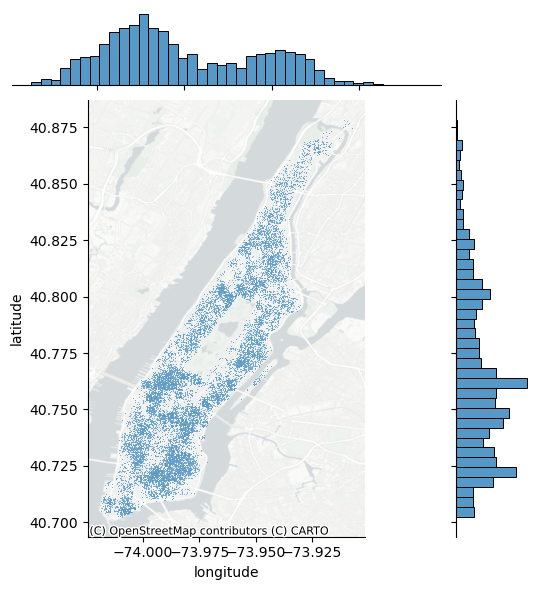

In [22]:
# Generate scatter plot
import contextily

joint_axes = seaborn.jointplot(x="longitude", y="latitude", data=listing, s=0.5)
contextily.add_basemap(joint_axes.ax_joint, crs="EPSG:4326", 
                       source=contextily.providers.CartoDB.PositronNoLabels)

To generate a density map for points data, you should firstly assign those points to different areal units. Hexagon is one of the most used units. For Manhattan, you can generate and add hexbin with 50 hexagons in each dimension without bordorline and with half transparency. (2 pts) Add a base map and colorbar and remove axes. (2 pts) Show your map below.

C:\Users\jewel\miniconda3\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


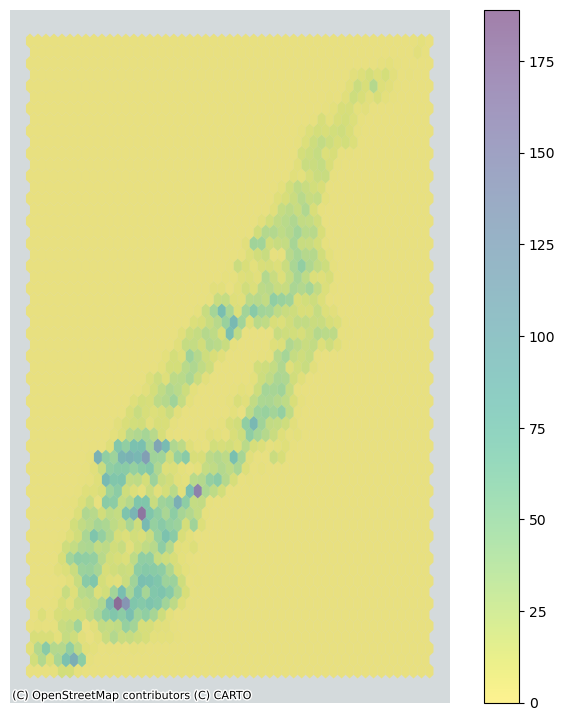

In [23]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(listing["longitude"],listing["latitude"], # crs="EPSG:4326", 
               gridsize=50, linewidths=0, alpha=0.5, cmap="viridis_r")
# Add basemap
contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

Find out the mean center (2 pts), median center (2 pts) and standardized ellipse of the Manhattan Airbnb listing. Legend and axis names should be added.

C:\Users\jewel\miniconda3\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


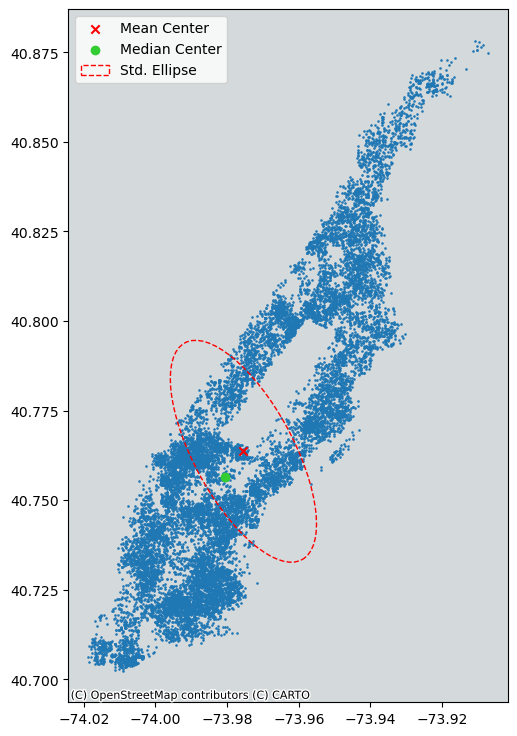

In [24]:
from pointpats import centrography
from matplotlib.patches import Ellipse

centrography.std_distance(listing[["longitude", "latitude"]])
major, minor, rotation = centrography.ellipse(listing[["longitude", "latitude"]])
mean_center = centrography.mean_center(listing[["longitude", "latitude"]])
med_center = centrography.euclidean_median(listing[["longitude", "latitude"]])

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(listing["longitude"], listing["latitude"], s=0.75)
ax.scatter(*mean_center, color="red", marker="x", label="Mean Center")
ax.scatter(*med_center, color="limegreen", marker="o", label="Median Center")

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(
    xy=mean_center,  # center the ellipse on our mean center
    width=major * 2,  # centrography.ellipse only gives half the axis
    height=minor * 2,
    angle=np.rad2deg(rotation),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="Std. Ellipse")
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron)
plt.show()

Why do the mean and median centers differ? (2 pts)

Generate a quadrat count map based on the listing. In each quadrat, the number of listings should be shown. (2 pts)

C:\Users\jewel\miniconda3\lib\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\jewel\miniconda3\lib\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


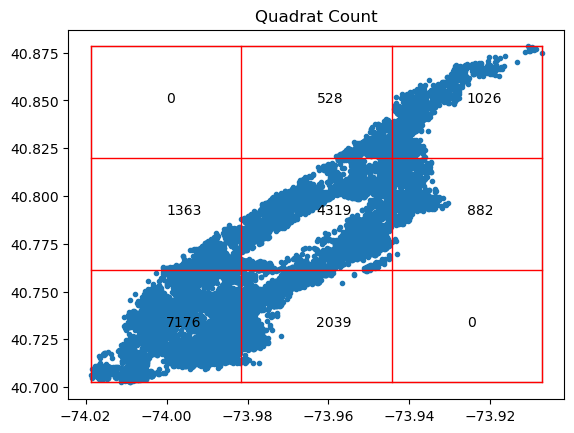

In [25]:
from pointpats import QStatistic
coordinates = listing[["longitude", "latitude"]].values
qstat = QStatistic(coordinates)
qstat.plot()

From the Quadrat Count figure, which areas have the densest Airbnbs? Provide some hypotheses for why this might be the case. (2 pts)

What is the p-value of a chi-squared test? How do you interpret the value? (2 pts)

In [26]:
qstat.chi2_pvalue

0.0